In [3]:
import argparse
import yaml
import os

from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.engine import FashionTrainer

from utils import *

In [4]:
# import os
# import os, json, cv2, random
# import numpy as np
# import matplotlib.pyplot as plt
# from detectron2.structures import BoxMode
# from tqdm import tqdm
# from ipywidgets import IntProgress
# from detectron2.utils.visualizer import Visualizer
# # import some common detectron2 utilities
# from detectron2 import model_zoo
# from detectron2.engine import DefaultPredictor
# from detectron2.config import get_cfg

# from detectron2.engine import DefaultTrainer, FashionTrainer

In [5]:
# from detectron2.data import build_detection_train_loader, build_detection_test_loader


In [18]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

1.6.0+cu101 True


In [7]:
parser = argparse.ArgumentParser()
parser.add_argument("--seed", type=int, default=7, help="random seed")
parser.add_argument("--data_name", type=str, default="Deepfashion", help='dataset name')
parser.add_argument("--model_name", type=str, default="mask_rcnn", help='model_name')
parser.add_argument("--input_path", type=str, default="../data/Deepfashion_dataset", help='input root path')
parser.add_argument("--output_path", type=str, default="../model/", help='output root path')
parser.add_argument("--model_path", type=str, default="COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml", 
                    help='--pretrained COCO dataset for semgentation task')
parser.add_argument("--config_path", type=str, default="./configs.yaml", 
                    help='-- convenient configs for models')
parser.add_argument("--pretrained_path", type=str, default="COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml", 
                    help='--pretrained weights for semgentation task of COCO dataset')

args = parser.parse_args(args=[])

In [ ]:
impoort 

In [17]:
logger.info({ arg: vars(args)[arg] for arg in vars(args)})


NameError: name 'logger' is not defined

In [8]:
def __main__():
    args = parser.parse_args()

In [9]:
set_seed(args.seed)
os.makedirs(args.output_path, exist_ok=True)

with open(args.config_path) as f:
    configs = yaml.load(f, Loader=yaml.FullLoader)

dataset = Dataset(args.input_path, args.data_name)

for d in ["train", "val"]:
    DatasetCatalog.register(f"{args.data_name}_" + d, lambda d=d: dataset.get_fashion_dicts(d))
    MetadataCatalog.get(f"{args.data_name}_" + d).set(thing_classes = configs['Detectron2']['LABEL_LIST'][args.data_name])

In [10]:
#fashion_metadata = MetadataCatalog.get(f"{args.data_name}_"+'train')

In [11]:
#dataset_dicts = dataset.get_fashion_dicts('train')

# model

In [12]:
cfg = get_cfg()
cfg.OUTPUT_DIR = f"{args.output_path}/{args.data_name}_{args.model_name}"
cfg.merge_from_file(model_zoo.get_config_file(args.model_path))
cfg.DATASETS.TRAIN = (f"{args.data_name}_train",)
cfg.DATASETS.TEST = (f"{args.data_name}_val",) # we modfiy in hooks.py, defaults.py, so it works
cfg.TEST.EVAL_PERIOD = configs['Detectron2']['EVAL_PERIOD'] # compute validation loss
cfg.DATALOADER.NUM_WORKERS = configs['Detectron2']['DATALOADER_NUM_WORKERS'] # cpu
cfg.SOLVER.IMS_PER_BATCH = configs['Detectron2']['SOLVER_IMS_PER_BATCH'] # allocation to 9000m
cfg.SOLVER.BASE_LR = configs['Detectron2']['SOLVER_BASE_LR'] # 0.00025  
cfg.SOLVER.CHECKPOINT_PERIOD = configs['Detectron2']['SOLVER_CHECKPOINT_PERIOD'] # saved model
cfg.SOLVER.MAX_ITER = configs['Detectron2']['SOLVER_MAX_ITER']   #20000  
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = configs['Detectron2']['MODEL_ROI_HEADS_BATCH_SIZE_PER_IMAGE']  # number of items in batch update
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(args.pretrained_path) 
cfg.MODEL.ROI_HEADS.NUM_CLASSES = len(configs['Detectron2']['LABEL_LIST'][args.data_name])  # num classes

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = FashionTrainer(cfg) 
trainer.resume_or_load(resume=False) # init

[10/29 13:55:02 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

Processing dataset: : 1000it [00:04, 213.91it/s]


train 1000 // 191961
[10/29 13:55:07 d2.data.build]: Removed 0 images with no usable annotations. 691 images left.
[10/29 13:55:07 d2.data.build]: Distribution of instances among all 13 categories:
|   category    | #instances   |   category    | #instances   |   category    | #instances   |
|:-------------:|:-------------|:-------------:|:-------------|:-------------:|:-------------|
| short sleev.. | 256          | long sleeve.. | 136          | short sleev.. | 1            |
| long sleeve.. | 50           |     vest      | 53           |     sling     | 3            |
|    shorts     | 153          |   trousers    | 226          |     skirt     | 105          |
| short sleev.. | 69           | long sleeve.. | 29           |  vest dress   | 69           |
|  sling dress  | 25           |               |              |               |              |
|     total     | 1175         |               |              |               |              |
[10/29 13:55:07 d2.data.common]: Serializi

0it [00:00, ?it/s]

val 0 // 32153
[10/29 13:55:09 d2.data.build]: Distribution of instances among all 13 categories:
|   category    | #instances   |   category    | #instances   |   category    | #instances   |
|:-------------:|:-------------|:-------------:|:-------------|:-------------:|:-------------|
| short sleev.. | 1            | long sleeve.. | 0            | short sleev.. | 0            |
| long sleeve.. | 0            |     vest      | 0            |     sling     | 0            |
|    shorts     | 0            |   trousers    | 0            |     skirt     | 1            |
| short sleev.. | 0            | long sleeve.. | 0            |  vest dress   | 0            |
|  sling dress  | 0            |               |              |               |              |
|     total     | 2            |               |              |               |              |
[10/29 13:55:09 d2.data.common]: Serializing 1 elements to byte tensors and concatenating them all ...
[10/29 13:55:09 d2.data.common]: Serial


Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (14, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (14,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (52, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (52,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due to incompatible shapes: (80, 256, 1, 1) in the checkpoint but (13, 256, 1,

In [13]:
trainer.train()

[10/29 13:55:09 d2.engine.train_loop]: Starting training from iteration 0


/home/appuser/detectron2_repo/code/src/detectron2/structures/masks.py:345: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  item = item.nonzero().squeeze(1).cpu().numpy().tolist()
/home/appuser/detectron2_repo/code/src/detectron2/structures/masks.py:345: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  item = item.nonzero().squeeze(1).cpu().numpy().tolist()
/home/appuser/detectron2_repo/code/src/detectron2/structures/masks.py:345: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python

val 0 // 32153
[10/29 13:55:32 d2.data.common]: Serializing 1 elements to byte tensors and concatenating them all ...
[10/29 13:55:32 d2.data.common]: Serialized dataset takes 0.00 MiB
[10/29 13:55:32 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/29 13:55:32 d2.evaluation.coco_evaluation]: 'Deepfashion_val' is not registered by `register_coco_instances`. Therefore trying to convert it to COCO format ...
WARNING [10/29 13:55:32 d2.data.datasets.coco]: Using previously cached COCO format annotations at '../model//Deepfashion_mask_rcnn/inference/Deepfashion_val_coco_format.json'. You need to clear the cache file if your dataset has been modified.
[10/29 13:55:32 d2.evaluation.evaluator]: Start inference on 1 images


[10/29 13:55:33 d2.evaluation.evaluator]: Inference done 1/1. 0.0853 s / img. ETA=0:00:00
[10/29 13:55:33 d2.evaluation.evaluator]: Total inference time: 0:00:00.265526 (0.265526 s / img per device, on 1 devices)
[10/29 13:55:33 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.085345 s / img per device, on 1 devices)
[10/29 13:55:33 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[10/29 13:55:33 d2.evaluation.coco_evaluation]: Saving results to ../model//Deepfashion_mask_rcnn/inference/coco_instances_results.json
[10/29 13:55:33 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
COCOeval_opt.evaluate() finished in 0.00 seconds.
Accumulating evaluation results...
COCOeval_opt.accumulate() finished in 0.04 seconds.
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all

0it [00:00, ?it/s]

val 0 // 32153
[10/29 13:55:56 d2.data.common]: Serializing 1 elements to byte tensors and concatenating them all ...
[10/29 13:55:56 d2.data.common]: Serialized dataset takes 0.00 MiB
[10/29 13:55:56 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/29 13:55:56 d2.evaluation.evaluator]: Start inference on 1 images


[10/29 13:55:57 d2.evaluation.evaluator]: Inference done 1/1. 0.0878 s / img. ETA=0:00:00
[10/29 13:55:57 d2.evaluation.evaluator]: Total inference time: 0:00:00.291589 (0.291589 s / img per device, on 1 devices)
[10/29 13:55:57 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.087805 s / img per device, on 1 devices)
[10/29 13:55:57 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[10/29 13:55:57 d2.evaluation.coco_evaluation]: Saving results to ../model//Deepfashion_mask_rcnn/inference/coco_instances_results.json
[10/29 13:55:57 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
COCOeval_opt.evaluate() finished in 0.00 seconds.
Accumulating evaluation results...
COCOeval_opt.accumulate() finished in 0.05 seconds.
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all

0it [00:00, ?it/s]

val 0 // 32153
[10/29 13:56:21 d2.data.common]: Serializing 1 elements to byte tensors and concatenating them all ...
[10/29 13:56:21 d2.data.common]: Serialized dataset takes 0.00 MiB
[10/29 13:56:21 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/29 13:56:21 d2.evaluation.evaluator]: Start inference on 1 images


[10/29 13:56:21 d2.evaluation.evaluator]: Inference done 1/1. 0.0879 s / img. ETA=0:00:00
[10/29 13:56:21 d2.evaluation.evaluator]: Total inference time: 0:00:00.264010 (0.264010 s / img per device, on 1 devices)
[10/29 13:56:21 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.087918 s / img per device, on 1 devices)
[10/29 13:56:21 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[10/29 13:56:21 d2.evaluation.coco_evaluation]: Saving results to ../model//Deepfashion_mask_rcnn/inference/coco_instances_results.json
[10/29 13:56:21 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
COCOeval_opt.evaluate() finished in 0.00 seconds.
Accumulating evaluation results...
COCOeval_opt.accumulate() finished in 0.05 seconds.
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all

0it [00:00, ?it/s]

val 0 // 32153
[10/29 13:56:45 d2.data.common]: Serializing 1 elements to byte tensors and concatenating them all ...
[10/29 13:56:45 d2.data.common]: Serialized dataset takes 0.00 MiB
[10/29 13:56:45 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/29 13:56:45 d2.evaluation.evaluator]: Start inference on 1 images


[10/29 13:56:46 d2.evaluation.evaluator]: Inference done 1/1. 0.0865 s / img. ETA=0:00:00
[10/29 13:56:46 d2.evaluation.evaluator]: Total inference time: 0:00:00.265970 (0.265970 s / img per device, on 1 devices)
[10/29 13:56:46 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.086500 s / img per device, on 1 devices)
[10/29 13:56:46 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[10/29 13:56:46 d2.evaluation.coco_evaluation]: Saving results to ../model//Deepfashion_mask_rcnn/inference/coco_instances_results.json
[10/29 13:56:46 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
COCOeval_opt.evaluate() finished in 0.00 seconds.
Accumulating evaluation results...
COCOeval_opt.accumulate() finished in 0.04 seconds.
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all

0it [00:00, ?it/s]

val 0 // 32153
[10/29 13:57:11 d2.data.common]: Serializing 1 elements to byte tensors and concatenating them all ...
[10/29 13:57:11 d2.data.common]: Serialized dataset takes 0.00 MiB
[10/29 13:57:11 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/29 13:57:11 d2.evaluation.evaluator]: Start inference on 1 images


[10/29 13:57:11 d2.evaluation.evaluator]: Inference done 1/1. 0.0853 s / img. ETA=0:00:00
[10/29 13:57:12 d2.evaluation.evaluator]: Total inference time: 0:00:00.266452 (0.266452 s / img per device, on 1 devices)
[10/29 13:57:12 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.085307 s / img per device, on 1 devices)
[10/29 13:57:12 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[10/29 13:57:12 d2.evaluation.coco_evaluation]: Saving results to ../model//Deepfashion_mask_rcnn/inference/coco_instances_results.json
[10/29 13:57:12 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
COCOeval_opt.evaluate() finished in 0.00 seconds.
Accumulating evaluation results...
COCOeval_opt.accumulate() finished in 0.05 seconds.
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all

0it [00:00, ?it/s]

val 0 // 32153
[10/29 13:57:12 d2.data.common]: Serializing 1 elements to byte tensors and concatenating them all ...
[10/29 13:57:12 d2.data.common]: Serialized dataset takes 0.00 MiB
[10/29 13:57:12 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/29 13:57:12 d2.evaluation.evaluator]: Start inference on 1 images


[10/29 13:57:13 d2.evaluation.evaluator]: Total inference time: 0:00:00.275059 (0.275059 s / img per device, on 1 devices)
[10/29 13:57:13 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.096371 s / img per device, on 1 devices)
[10/29 13:57:13 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[10/29 13:57:13 d2.evaluation.coco_evaluation]: Saving results to ../model//Deepfashion_mask_rcnn/inference/coco_instances_results.json
[10/29 13:57:13 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
COCOeval_opt.evaluate() finished in 0.00 seconds.
Accumulating evaluation results...
COCOeval_opt.accumulate() finished in 0.04 seconds.
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets

In [14]:
cfg

CfgNode({'VERSION': 2, 'MODEL': CfgNode({'LOAD_PROPOSALS': False, 'MASK_ON': True, 'KEYPOINT_ON': False, 'DEVICE': 'cuda', 'META_ARCHITECTURE': 'GeneralizedRCNN', 'WEIGHTS': 'https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl', 'PIXEL_MEAN': [103.53, 116.28, 123.675], 'PIXEL_STD': [1.0, 1.0, 1.0], 'BACKBONE': CfgNode({'NAME': 'build_resnet_fpn_backbone', 'FREEZE_AT': 2}), 'FPN': CfgNode({'IN_FEATURES': ['res2', 'res3', 'res4', 'res5'], 'OUT_CHANNELS': 256, 'NORM': '', 'FUSE_TYPE': 'sum'}), 'PROPOSAL_GENERATOR': CfgNode({'NAME': 'RPN', 'MIN_SIZE': 0}), 'ANCHOR_GENERATOR': CfgNode({'NAME': 'DefaultAnchorGenerator', 'SIZES': [[32], [64], [128], [256], [512]], 'ASPECT_RATIOS': [[0.5, 1.0, 2.0]], 'ANGLES': [[-90, 0, 90]], 'OFFSET': 0.0}), 'RPN': CfgNode({'HEAD_NAME': 'StandardRPNHead', 'IN_FEATURES': ['p2', 'p3', 'p4', 'p5', 'p6'], 'BOUNDARY_THRESH': -1, 'IOU_THRESHOLDS': [0.3, 0.7], 'IOU_LABELS': [0, -1, 1], 'BATCH_SIZ

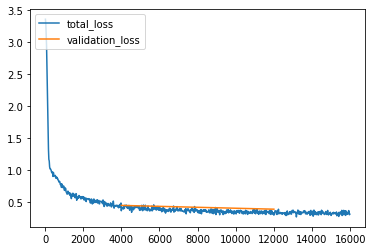

In [2]:
%matplotlib inline
import json
import matplotlib.pyplot as plt

experiment_folder = '../model/Deepfashion_mask_rcnn/'

def load_json_arr(json_path):
    lines = []
    with open(json_path, 'r') as f:
        for line in f:
            lines.append(json.loads(line))
    return lines

experiment_metrics = load_json_arr(experiment_folder + '/metrics.json')
experiment_metrics
plt.plot(
    [x['iteration'] for x in experiment_metrics ], 
    [x['total_loss'] for x in experiment_metrics])
plt.plot(
    [x['iteration'] for x in experiment_metrics if 'validation_loss' in x], 
    [x['validation_loss'] for x in experiment_metrics if 'validation_loss' in x])
plt.legend(['total_loss', 'validation_loss'], loc='upper left')
plt.show()

In [16]:
experiment_metrics

[{'bbox/AP': 0.0,
  'bbox/AP-long sleeve dress': nan,
  'bbox/AP-long sleeve outwear': nan,
  'bbox/AP-long sleeve top': nan,
  'bbox/AP-short sleeve dress': nan,
  'bbox/AP-short sleeve outwear': nan,
  'bbox/AP-short sleeve top': 0.0,
  'bbox/AP-shorts': nan,
  'bbox/AP-skirt': 0.0,
  'bbox/AP-sling': nan,
  'bbox/AP-sling dress': nan,
  'bbox/AP-trousers': nan,
  'bbox/AP-vest': nan,
  'bbox/AP-vest dress': nan,
  'bbox/AP50': 0.0,
  'bbox/AP75': 0.0,
  'bbox/APl': 0.0,
  'bbox/APm': nan,
  'bbox/APs': nan,
  'data_time': 0.027533530490472913,
  'eta_seconds': 87.85532979294658,
  'fast_rcnn/cls_accuracy': 0.06931189196199228,
  'fast_rcnn/false_negative': 0.04935696906499826,
  'fast_rcnn/fg_cls_accuracy': 0.03811405985319029,
  'iteration': 19,
  'loss_box_reg': 0.0758245699107647,
  'loss_cls': 2.5426578521728516,
  'loss_mask': 0.6940471827983856,
  'loss_rpn_cls': 0.023882383480668068,
  'loss_rpn_loc': 0.015956449322402477,
  'lr': 1.9981e-06,
  'mask_rcnn/accuracy': 0.4505780

CfgNode({'EXPECTED_RESULTS': [], 'EVAL_PERIOD': 0, 'KEYPOINT_OKS_SIGMAS': [], 'DETECTIONS_PER_IMAGE': 100, 'AUG': CfgNode({'ENABLED': False, 'MIN_SIZES': (400, 500, 600, 700, 800, 900, 1000, 1100, 1200), 'MAX_SIZE': 4000, 'FLIP': True}), 'PRECISE_BN': CfgNode({'ENABLED': False, 'NUM_ITER': 200})})

In [26]:
cfg

CfgNode({'VERSION': 2, 'MODEL': CfgNode({'LOAD_PROPOSALS': False, 'MASK_ON': True, 'KEYPOINT_ON': False, 'DEVICE': 'cuda', 'META_ARCHITECTURE': 'GeneralizedRCNN', 'WEIGHTS': './pretrained/mask_rcnn_model.pth', 'PIXEL_MEAN': [103.53, 116.28, 123.675], 'PIXEL_STD': [1.0, 1.0, 1.0], 'BACKBONE': CfgNode({'NAME': 'build_resnet_fpn_backbone', 'FREEZE_AT': 2}), 'FPN': CfgNode({'IN_FEATURES': ['res2', 'res3', 'res4', 'res5'], 'OUT_CHANNELS': 256, 'NORM': '', 'FUSE_TYPE': 'sum'}), 'PROPOSAL_GENERATOR': CfgNode({'NAME': 'RPN', 'MIN_SIZE': 0}), 'ANCHOR_GENERATOR': CfgNode({'NAME': 'DefaultAnchorGenerator', 'SIZES': [[32], [64], [128], [256], [512]], 'ASPECT_RATIOS': [[0.5, 1.0, 2.0]], 'ANGLES': [[-90, 0, 90]], 'OFFSET': 0.0}), 'RPN': CfgNode({'HEAD_NAME': 'StandardRPNHead', 'IN_FEATURES': ['p2', 'p3', 'p4', 'p5', 'p6'], 'BOUNDARY_THRESH': -1, 'IOU_THRESHOLDS': [0.3, 0.7], 'IOU_LABELS': [0, -1, 1], 'BATCH_SIZE_PER_IMAGE': 256, 'POSITIVE_FRACTION': 0.5, 'BBOX_REG_LOSS_TYPE': 'smooth_l1', 'BBOX_REG_

In [18]:
result = trainer.train()

[10/29 08:29:20 d2.engine.train_loop]: Starting training from iteration 0
[10/29 08:29:26 d2.utils.events]:  eta: 0:00:18  iter: 19  total_loss: 4.155  loss_cls: 3.353  loss_box_reg: 0.1056  loss_mask: 0.696  loss_rpn_cls: 0.0002127  loss_rpn_loc: 0.003841  time: 0.2292  data_time: 0.0506  lr: 1.9981e-06  max_mem: 2423M
[10/29 08:29:32 d2.utils.events]:  eta: 0:00:13  iter: 39  total_loss: 3.754  loss_cls: 2.969  loss_box_reg: 0.09004  loss_mask: 0.6928  loss_rpn_cls: 0.0001444  loss_rpn_loc: 0.003949  time: 0.2295  data_time: 0.0538  lr: 3.9961e-06  max_mem: 2423M
[10/29 08:29:38 d2.utils.events]:  eta: 0:00:09  iter: 59  total_loss: 2.888  loss_cls: 2.115  loss_box_reg: 0.1019  loss_mask: 0.6765  loss_rpn_cls: 0.000302  loss_rpn_loc: 0.003721  time: 0.2313  data_time: 0.0542  lr: 5.9941e-06  max_mem: 2423M
[10/29 08:29:44 d2.utils.events]:  eta: 0:00:04  iter: 79  total_loss: 1.871  loss_cls: 1.1  loss_box_reg: 0.1064  loss_mask: 0.6587  loss_rpn_cls: 0.0001056  loss_rpn_loc: 0.00392

In [15]:
# train_loader = build_detection_train_loader(cfg, "k_fashion_train")
# val_loader = build_detection_test_loader(cfg, "k_fashion_val")

train 0 // 544
[10/29 08:04:21 d2.data.build]: Removed 0 images with no usable annotations. 544 images left.
[10/29 08:04:21 d2.data.common]: Serializing 544 elements to byte tensors and concatenating them all ...
[10/29 08:04:21 d2.data.common]: Serialized dataset takes 0.73 MiB
[10/29 08:04:21 d2.data.build]: Using training sampler TrainingSampler
val 0 // 68
[10/29 08:04:21 d2.data.build]: Distribution of instances among all 18 categories:
|   category    | #instances   |   category   | #instances   |  category  | #instances   |
|:-------------:|:-------------|:------------:|:-------------|:----------:|:-------------|
|   cardigan    | 0            |   knitwear   | 9            |   dress    | 29           |
|     vest      | 1            |    blouse    | 2            |   shirts   | 4            |
|     skirt     | 2            |    jacket    | 1            |   jumper   | 1            |
|   jumpsuit    | 0            | jogger pants | 1            |    jean    | 2            |
|     c

In [16]:
assert trainer.model.training



In [17]:
batch_inputs = next(iter(trainer.data_loader))

/home/appuser/detectron2_repo/detectron2/structures/masks.py:345: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  item = item.nonzero().squeeze(1).cpu().numpy().tolist()


In [18]:
batch_inputs

[{'file_name': './data/kfashion_dataset/train/image/000364.jpg',
  'height': 800,
  'image': tensor([[[179, 179, 178,  ..., 205, 204, 203],
           [178, 179, 179,  ..., 205, 205, 204],
           [178, 179, 180,  ..., 205, 205, 204],
           ...,
           [163, 161, 163,  ..., 188, 189, 189],
           [164, 163, 164,  ..., 188, 188, 189],
           [161, 162, 162,  ..., 190, 189, 189]],
  
          [[181, 181, 180,  ..., 203, 202, 201],
           [180, 181, 181,  ..., 203, 203, 202],
           [180, 181, 182,  ..., 203, 203, 202],
           ...,
           [166, 164, 166,  ..., 187, 188, 188],
           [167, 166, 167,  ..., 187, 187, 188],
           [164, 165, 165,  ..., 189, 188, 188]],
  
          [[181, 181, 180,  ..., 203, 202, 201],
           [180, 181, 182,  ..., 203, 203, 202],
           [180, 182, 183,  ..., 203, 203, 202],
           ...,
           [170, 168, 170,  ..., 189, 190, 190],
           [171, 170, 171,  ..., 189, 189, 190],
           [168, 169

In [19]:
data = next(self._data_loader_iter)
data_time = time.perf_counter() - start

loss_dict = self.model(data)
losses = sum(loss_dict.values())

NameError: name 'self' is not defined

In [ ]:
def train(self, start_iter: int, max_iter: int):
    """
    Args:
        start_iter, max_iter (int): See docs above
    """
    logger = logging.getLogger(__name__)
    logger.info("Starting training from iteration {}".format(start_iter))

    self.iter = self.start_iter = start_iter
    self.max_iter = max_iter

    with EventStorage(start_iter) as self.storage:
        try:
            self.before_train()
            for self.iter in range(start_iter, max_iter):
                self.before_step()
                self.run_step()
                self.after_step()
            # self.iter == max_iter can be used by `after_train` to
            # tell whether the training successfully finished or failed
            # due to exceptions.
            self.iter += 1
        except Exception:
            logger.exception("Exception during training:")
            raise
        finally:
            self.after_train()

In [53]:
train(self)

TypeError: train() missing 2 required positional arguments: 'start_iter' and 'max_iter'

In [42]:
trainer.register_hooks(trainer.build_hooks())

|   category    | #instances   |   category    | #instances   |   category    | #instances   |
|:-------------:|:-------------|:-------------:|:-------------|:-------------:|:-------------|
| short sleeve top | 71645        | long sleeve top | 36064        | short sleeve outwear | 543          |
| long sleeve outwear | 13457        |     vest      | 16095        |     sling     | 1985         |
|    shorts     | 36616        |   trousers    | 55387        |     skirt     | 30835        |
| short sleeve dress | 17211        | long sleeve dress | 7907         |  vest dress   | 17949        |
|  sling dress  | 6492         |               |              |               |              |
|     total     | 312186       |               |              |               |              |

|   category    | #instances   |   category    | #instances   |   category    | #instances   |
|:-------------:|:-------------|:-------------:|:-------------|:-------------:|:-------------|
| short sleev.. | 50188        | long sleeve.. | 25765        | short sleev.. | 360          |
| long sleeve.. | 9350         |     vest      | 11281        |     sling     | 1396         |
|    shorts     | 30497        |   trousers    | 46385        |     skirt     | 21332        |
| short sleev.. | 11093        | long sleeve.. | 5030         |  vest dress   | 11760        |
|  sling dress  | 4121         |               |              |               |              |
|     total     | 228558       |               |              |               |              |

---
# infer

- kernel restart 요망
- inference.py를 위한 함수 포함 재작성

import os
import os, json, cv2, random
import numpy as np
import matplotlib.pyplot as plt
from detectron2.structures import BoxMode
from tqdm import tqdm
from ipywidgets import IntProgress
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.utils.visualizer import Visualizer
# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg

from detectron2.engine import DefaultTrainer


def add_filename(json_):
    with open(json_) as f:
        imgs_anns = json.load(f)
        img_extension = json_.split('/')[-1].split('.')[0]+'.jpg'
        imgs_anns['filename'] = img_extension
    return imgs_anns

def cv2_imshow(a, **kwargs):
    a = a.clip(0, 255).astype('uint8')
    # cv2 stores colors as BGR; convert to RGB
    if a.ndim == 3:
        if a.shape[2] == 4:
            a = cv2.cvtColor(a, cv2.COLOR_BGRA2RGBA)
        else:
            a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)

    return plt.imshow(a, **kwargs)



def get_fashion_dicts(d):
    img_root = f"en/{d}/image"
    ann_root = f"en/{d}/annos"
    json_files = [os.path.join(ann_root, f) for f in os.listdir(ann_root)]

    dataset_dicts = []
    for idx, j in enumerate(json_files):
        v = add_filename(j)
        if v['source'] == 'shop':
            record = {}
            filename = os.path.join(img_root, v["filename"])
            height, width = cv2.imread(filename).shape[:2]
            record["file_name"] = filename
            record["image_id"] = idx
            record["height"] = height
            record["width"] = width

            items = sorted([item for item in v.keys() if 'item' in item])
            objs = []
            for key in items:
                anno = v[key]
                obj = {
                "bbox": anno['bounding_box'],
                "bbox_mode": BoxMode.XYXY_ABS,
                "segmentation": anno['segmentation'],
                "category_id": anno['category_id'],
                "category_name": anno['category_name']
                }
                objs.append(obj)
            record["annotations"] = objs        

            dataset_dicts.append(record)

            if idx % 3000==0: print(d,idx,'//',len(json_files))

    return dataset_dicts




# test에 label이 없음
d= 'validation'
DatasetCatalog.register("fashion_" + d, lambda d=d: get_fashion_dicts(d))
MetadataCatalog.get("fashion_" + d).set(thing_classes=[  'short sleeve top',
                                                         'long sleeve top',
                                                         'short sleeve outwear',
                                                         'long sleeve outwear',
                                                         'vest',
                                                         'sling',
                                                         'shorts',
                                                         'trousers',
                                                         'skirt',
                                                         'short sleeve dress',
                                                         'long sleeve dress',
                                                         'vest dress',
                                                         'sling dress']
                                       )
fashion_metadata = MetadataCatalog.get("fashion_validation")

In [5]:
import logging
import os

logger = logging.getLogger()
logger.setLevel(logging.INFO)
from detectron2.data import build_detection_test_loader

In [6]:
# cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.05

In [7]:
cfg = get_cfg()

cfg.OUTPUT_DIR = "k_fashion_mask_rcnn_tmp"
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ()
cfg.DATASETS.TEST = () # WARNING [10/12 06:29:20 d2.engine.defaults]: No evaluator found. Use `DefaultTrainer.test(evaluators=)`, or implement its `build_evaluator` method.

cfg.DATALOADER.NUM_WORKERS = 4
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 1024   # faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 18  # num classes


# cfg already contains everything we've set previously. Now we changed it a little bit for inference:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")  # path to the model we just trained
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set a custom testing threshold
predictor = DefaultPredictor(cfg)

NameError: name 'get_cfg' is not defined

In [8]:
cfg.MODEL.ROI_HEADS.NMS_THRESH_TEST

NameError: name 'cfg' is not defined

In [40]:
from detectron2.utils.visualizer import ColorMode



dataset_dicts = get_fashion_dicts("test")

test 0 // 68


d='validation'
DatasetCatalog.register("fashion_" + d, lambda d=d: get_fashion_dicts(d))
MetadataCatalog.get("fashion_" + d).set(thing_classes=[  'short sleeve top',
                                                         'long sleeve top',
                                                         'short sleeve outwear',
                                                         'long sleeve outwear',
                                                         'vest',
                                                         'sling',
                                                         'shorts',
                                                         'trousers',
                                                         'skirt',
                                                         'short sleeve dress',
                                                         'long sleeve dress',
                                                         'vest dress',
                                                         'sling dress']
                                       )

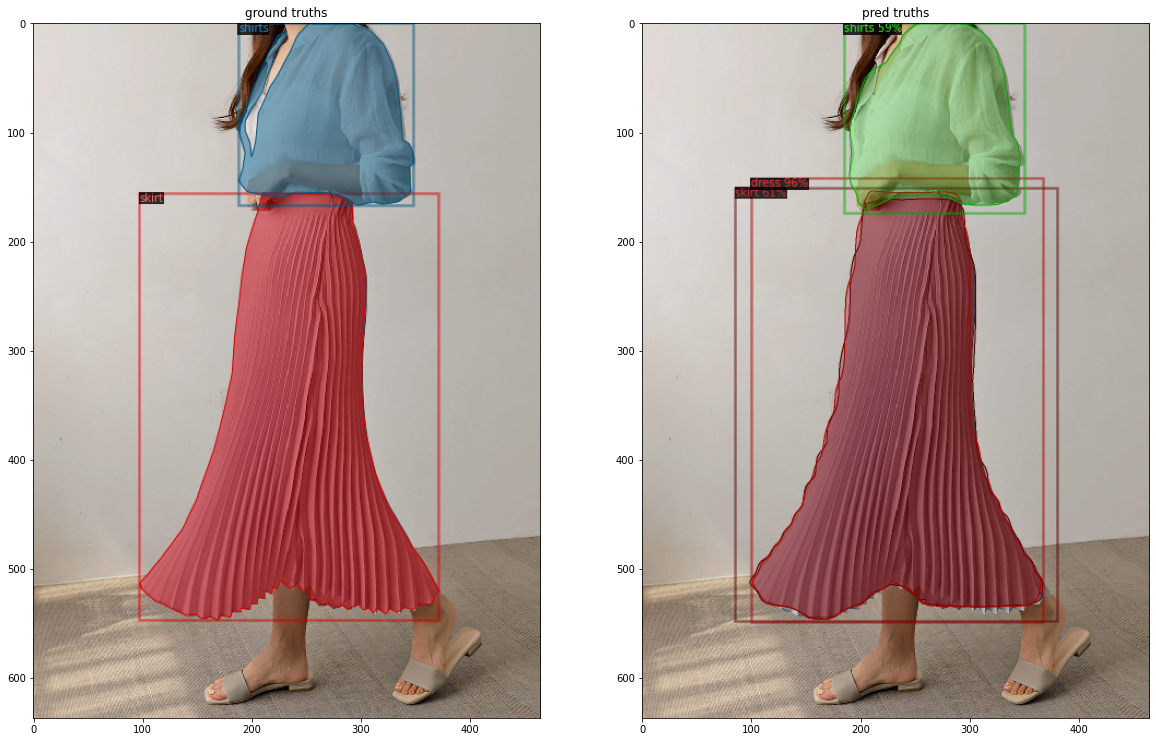

In [41]:
#for d in random.sample(dataset_dicts, 3):   
ix =12
d= dataset_dicts[ix]
im = cv2.imread(d["file_name"])

plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.title('ground truths')
v = Visualizer(im[:, :, ::-1],
               metadata=fashion_metadata, 
               scale=0.5, 
               instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
)
#out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
# ground truths
out = v.draw_dataset_dict(d)

cv2_imshow(out.get_image()[:, :, ::-1])

plt.subplot(1,2,2)
plt.title('pred truths')


outputs = predictor(im)  # format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format
v = Visualizer(im[:, :, ::-1],
               metadata=fashion_metadata, 
               scale=0.5, 
               instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

cv2_imshow(out.get_image()[:, :, ::-1])

fashion_metadata = MetadataCatalog.get("fashion_validation")

In [37]:
print(d)
print(np.array(tc)[outputs['instances'].get('pred_classes').cpu().numpy()])
print(outputs['instances'].get('scores').cpu().numpy())


{'file_name': './data/kfashion_dataset/test/image/001110.jpg', 'image_id': 12, 'height': 1274, 'width': 930, 'pair_id': 260, 'annotations': [{'bbox': [194.916, 311.095, 742.68, 1093.76], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'segmentation': [[531.272, 313.594, 495.287, 312.594, 470.298, 312.594, 442.31, 312.594, 420.319, 311.595, 412.323, 343.585, 404.326, 366.578, 390.332, 414.563, 382.336, 463.548, 377.338, 511.533, 369.341, 573.514, 364.343, 642.493, 352.349, 700.475, 331.358, 782.359, 316.364, 824.346, 299.371, 873.331, 273.383, 928.314, 236.399, 978.299, 205.412, 1016.29, 195.416, 1026.28, 198.415, 1037.28, 223.404, 1059.27, 243.395, 1067.27, 263.387, 1078.27, 281.379, 1086.27, 297.372, 1084.27, 309.367, 1092.26, 325.36, 1088.27, 337.355, 1094.26, 344.352, 1085.27, 361.345, 1089.26, 366.343, 1075.27, 380.337, 1080.27, 380.337, 1072.27, 396.33, 1075.27, 399.328, 1064.27, 410.324, 1064.27, 412.323, 1052.28, 424.318, 1055.28, 424.318, 1040.28, 437.312, 1046.28, 439.311, 1033.28, 448.30

In [81]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("k_fashion_test", cfg, False, output_dir="./k_fashion_mask_rcnn_out_tmp/")
test_loader = build_detection_test_loader(cfg, "k_fashion_test")
# another equivalent way to evaluate the model is to use `trainer.test`
# eval temporal
print(inference_on_dataset(predictor.model, test_loader, evaluator))

test 0 // 68
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
COCOeval_opt.evaluate() finished in 0.02 seconds.
Accumulating evaluation results...
COCOeval_opt.accumulate() finished in 0.05 seconds.
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.561
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.651
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.647
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.700
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.563
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.795
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.795
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDet

In [95]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("k_fashion_test", cfg, False, output_dir="./k_fashion_mask_rcnn_out/")
test_loader = build_detection_test_loader(cfg, "k_fashion_test")
# another equivalent way to evaluate the model is to use `trainer.test`
print(inference_on_dataset(trainer.model, test_loader, evaluator))

[10/21 08:08:50 d2.evaluation.coco_evaluation]: 'k_fashion_test' is not registered by `register_coco_instances`. Therefore trying to convert it to COCO format ...
[10/21 08:08:50 d2.data.datasets.coco]: Converting annotations of dataset 'k_fashion_test' to COCO format ...)
test 0 // 68
[10/21 08:08:51 d2.data.datasets.coco]: Converting dataset dicts into COCO format
[10/21 08:08:51 d2.data.datasets.coco]: Conversion finished, #images: 68, #annotations: 86
[10/21 08:08:51 d2.data.datasets.coco]: Caching COCO format annotations at './k_fashion_mask_rcnn_out/k_fashion_test_coco_format.json' ...
test 0 // 68
[10/21 08:08:51 d2.data.build]: Distribution of instances among all 18 categories:
|   category    | #instances   |   category   | #instances   |  category  | #instances   |
|:-------------:|:-------------|:------------:|:-------------|:----------:|:-------------|
|   cardigan    | 0            |   knitwear   | 8            |   dress    | 30           |
|     vest      | 0            |

In [222]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("k_fashion_test", cfg, False, output_dir="./k_fashion_mask_rcnn_out/")
test_loader = build_detection_test_loader(cfg, "k_fashion_test")

Using previously cached COCO format annotations at './k_fashion_mask_rcnn_out/k_fashion_test_coco_format.json'. You need to clear the cache file if your dataset has been modified.


test 0 // 68


----

# extraction

In [107]:
class_lists= ['cardigan',
 'knitwear',
 'dress',
 'vest',
 'blouse',
 'shirts',
 'skirt',
 'jacket',
 'jumper',
 'jumpsuit',
 'jogger pants',
 'jean',
 'coat',
 'top',
 't-shirts',
 'padded jacket',
 'pants',
 'hoody']

def get_box_feature(batched_inputs, predictor, split, type_ = 'mask_pool'):
    with torch.no_grad():
        
        images = predictor.model.preprocess_image(batched_inputs)
        roi_heads_module = predictor.model.roi_heads

        
        # fpn features
        features = predictor.model.backbone(images.tensor) 
        feature_lists = [features[f] for f in roi_heads_module.box_in_features]
        
        # candidate
        proposals, _ = predictor.model.proposal_generator(images, features, None)
        
        
        box_features_roi_align = roi_heads_module.box_pooler(feature_lists, [x.proposal_boxes for x in proposals] )        
        
        # for all proposal
        box_features_fc = roi_heads_module.box_head(box_features_roi_align)        
        
        # get predicted proposal
        pred_score_bbox = roi_heads_module.box_predictor(box_features_fc)
        pred_add_box, sel_idx= roi_heads_module.box_predictor.inference(pred_score_bbox, proposals)
        # 1) torch.Size([2, 1024])
        roi_vector = box_features_fc[sel_idx]
        # 2) torch.Size([2, 12544])
        roi_pool = box_features_roi_align.flatten(start_dim=1)[sel_idx]
        
        # mask
        # 이미 box2개 고름
        boxes_pred = [ x.pred_boxes for x in pred_add_box]
        pred_box_features_roi_align = roi_heads_module.box_pooler(feature_lists, boxes_pred)[sel_idx]                
        pred_box_features_fc = roi_heads_module.box_head(pred_box_features_roi_align)[sel_idx]        

        
        features_for_mask = roi_heads_module.mask_pooler(feature_lists, boxes_pred)
        
        # 3) torch.Size([2, 256, 14, 14])
        mask_pool = features_for_mask.flatten(start_dim=1)
        # 4)
        # torch.Size([2, 18, 28, 28])
        mask_pred = roi_heads_module.mask_head.layers(features_for_mask).flatten(start_dim=1)
        
        N = len(roi_vector)
        meta_lists = [(dict_['pair_id'], os.path.basename(dict_['file_name'])) for dict_ in batched_inputs]

        total_meta_lists = meta_lists*N
        
        classes = [class_lists[cls_.item()] for ins in pred_add_box for cls_ in ins.pred_classes]
        
        
        if type_ == 'box_fc':
            vectors = roi_vector
        elif type_ == 'box_pool':
            vectors = roi_pool
        elif type_ =='mask_pred':
            vectors = mask_pred
        elif type_ == 'mask_pool':
            vectors = mask_pool
        else:
            raise NotImplementedError


        
        output_lists = []
        for (pair_id, id_), v, cls_ in zip(total_meta_lists, vectors, classes):
            output_lists.append({'split':split,
                                 'id': id_,
                                 'pair_id': pair_id,
                                 'feature':v.detach().cpu().numpy() ,
                                 'label':cls_ })
        
        return output_lists 
    


In [84]:
train_loader = build_detection_test_loader(cfg, "k_fashion_train")
val_loader = build_detection_test_loader(cfg, "k_fashion_val")
test_loader = build_detection_test_loader(cfg, "k_fashion_test")
test_loader

train 0 // 544
val 0 // 68
test 0 // 68


In [85]:
assert not predictor.model.training
# iters = iter(test_loader)
# next(iters)
# batched_inputs = next(iters)
# batched_inputs

In [86]:
os.makedirs('k_fashion_mask_rcnn_out/feature_extraction', exist_ok =True)

In [108]:
from sklearn.decomposition import PCA
import pickle
types = ['box_fc', 'box_pool', 'mask_pred', 'mask_pool']
for type_ in types:
    print(type_,'...')
    total_dict = []
    for batched_inputs in train_loader:
        total_dict.extend(get_box_feature(batched_inputs, predictor, 'train', type_ = type_))
    for batched_inputs in val_loader:
        total_dict.extend(get_box_feature(batched_inputs, predictor, 'val', type_ = type_))
    for batched_inputs in test_loader:
        total_dict.extend(get_box_feature(batched_inputs, predictor, 'test', type_ = type_))
    
    if type_ == 'box_fc':
        with open(f'k_fashion_mask_rcnn_out/feature_extraction/{type_}.pkl', 'wb') as f:
            pickle.dump( total_dict,f)
            
            
            
        X = np.array([dict_['feature'] for dict_ in total_dict])
        pca = PCA(whiten=True, n_components=256)
        whitened = pca.fit_transform(X)
        pca_dict = []
        for v, dict_ in zip(whitened, total_dict):
            dict_['feature'] = v
            pca_dict.append(dict_)
        with open(f'k_fashion_mask_rcnn_out/feature_extraction/{type_}_pca.pkl', 'wb') as f:
            pickle.dump(pca_dict,f )
            
    else:
        X = np.array([dict_['feature'] for dict_ in total_dict])
        pca = PCA(whiten=True, n_components=256)
        whitened = pca.fit_transform(X)
        pca_dict = []
        for v, dict_ in zip(whitened, total_dict):
            dict_['feature'] = v
            pca_dict.append(dict_)
        with open(f'k_fashion_mask_rcnn_out/feature_extraction/{type_}_pca.pkl', 'wb') as f:
            pickle.dump(pca_dict,f )


box_fc ...
box_pool ...
mask_pred ...
mask_pool ...


In [112]:

with open(f'k_fashion_mask_rcnn_out/feature_extraction/{types[0]}_pca.pkl', 'rb') as f:
    data = pickle.load(f )
data[0]

{'feature': array([ 1.22999716e+00, -8.01665306e-01,  6.54078603e-01,  6.37992620e-01,
         7.95316935e-01, -1.39422381e+00, -2.67809296e+00, -6.27737641e-01,
         1.58240840e-01,  1.25213933e+00, -1.20078862e+00,  6.56737864e-01,
         5.17536640e-01,  5.27465641e-01, -1.29459906e+00, -2.39213419e+00,
         2.29204655e-01,  1.60598949e-01,  3.36040229e-01, -1.07474148e-01,
        -5.13224415e-02, -1.95900835e-02,  4.52266455e-01,  2.49020767e+00,
         6.95574284e-01, -1.44092548e+00, -1.16028786e-01,  1.06031585e+00,
        -2.88553566e-01,  3.46190989e-01, -1.32037997e-01,  2.02960467e+00,
        -1.19227982e+00,  2.94111460e-01, -1.63187385e-01,  8.05704534e-01,
        -9.55553114e-01,  7.37558454e-02, -4.42563564e-01,  9.60741580e-01,
         1.84793615e+00,  1.04203689e+00, -1.87847301e-01, -9.34304595e-01,
        -9.60814416e-01,  1.23586154e+00, -5.52835047e-01,  4.44095790e-01,
        -6.20954454e-01,  7.06327260e-01,  6.63083255e-01,  4.88175660e-01,
 

In [110]:
with open(f'k_fashion_mask_rcnn_out/feature_extraction/{types[0]}.pkl', 'rb') as f:
    data = pickle.load(f )
data[0]['feature'].shape

(1024,)

In [111]:
with open(f'k_fashion_mask_rcnn_out/feature_extraction/{types[1]}_pca.pkl', 'rb') as f:
    data = pickle.load(f )
data[0]['feature']

array([-4.67526525e-01,  3.96101534e-01,  1.15097606e+00,  8.07461739e-01,
        1.23090386e+00, -7.69172788e-01, -1.30254948e+00,  2.38525200e+00,
       -4.23927605e-01, -4.41630691e-01, -1.22957611e+00,  1.75278866e+00,
        5.78009427e-01, -1.66906834e+00,  8.23120594e-01, -9.93321836e-01,
        4.00012404e-01,  7.47794807e-01, -1.30452573e+00, -4.01578248e-01,
       -4.44284439e-01,  9.35363531e-01, -1.54442728e+00,  1.25927675e+00,
        1.63391516e-01,  3.77009004e-01,  1.24916947e+00, -1.32605791e+00,
        1.04287267e+00,  6.76969513e-02,  2.84097701e-01, -1.22995043e+00,
        4.48473096e-01, -6.21652484e-01, -1.10437989e-01, -1.02810070e-01,
        8.30293357e-01, -1.28965759e+00,  7.14285612e-01,  4.20403816e-02,
        2.24927008e-01,  1.27273595e+00,  1.01610291e+00, -4.25538301e-01,
        9.54069272e-02,  4.48185913e-02,  1.21670485e+00,  1.13926303e+00,
       -8.89046371e-01,  1.41787660e+00,  5.10479808e-01, -7.35933065e-01,
       -4.74037766e-01, -

In [68]:
f'k_fashion_mask_rcnn_out/feature_extraction/{types[0]}_pca.pkl'

'k_fashion_mask_rcnn_out/feature_extraction/box_fc_pca.pkl'

In [105]:
with open(f'k_fashion_mask_rcnn_out/feature_extraction/{types[3]}_pca.pkl', 'rb') as f:
    data = pickle.load(f )
data[0]['feature'].shape

(256,)

In [30]:
import pickle
from collections import Counter
types = ['box_fc', 'box_pool', 'mask_pred', 'mask_pool']

with open(os.path.join("k_fashion_mask_rcnn_out/feature_extraction/",f'{types[1]}_pca.pkl'), 'rb') as f:
    data = pickle.load(f )
Counter([i['label'] for i in data])

Counter({'blouse': 7,
         'cardigan': 1,
         'coat': 49,
         'dress': 352,
         'hoody': 18,
         'jacket': 48,
         'jean': 36,
         'jogger pants': 3,
         'jumper': 10,
         'knitwear': 78,
         'padded jacket': 4,
         'pants': 122,
         'shirts': 21,
         'skirt': 28,
         't-shirts': 146,
         'top': 11,
         'vest': 3})

----

```python
# model parameter
# e.g. Model Params: 34.85M FLOPs: 10.65G
from thop import profile, clever_format

flops, params = profile(model, inputs=(torch.randn(1, 3, 224, 224).cuda(),))
flops, params = clever_format([flops, params])
print('# Model Params: {} FLOPs: {}'.format(params, flops))
```
